### Purpose of the Project

The aim of the project is to examine the indicators in JD.com's e-commerce operation data set, with the goal of gaining insight into user shopping behavior and offering support and suggestions to aid in operational decision-making

### Columns Explanation

user_id: user primary key
sku_id: product unique primary key
action_time: customer activity time
type: behavior type 1--browser 2--purchase 3--customers closely watch on the product 4--review 5--add in the cart

In [1]:
# Import basic data manupulation library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from datetime import datetime
plt.style.use('ggplot')

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

### Clean the data

In [5]:
user_action = pd.read_csv('C:/Users/16693/Desktop/data parctice/input/jdata_action.csv')

In [6]:
user_action.head()

,user_id,sku_id,action_time,module_id,type
0,937922,357022,2018-02-04 08:28:15,8107857,1
1,937922,73,2018-02-04 08:27:07,8107857,1
2,937922,29583,2018-02-04 08:26:31,8107857,1
3,937922,108763,2018-02-04 08:26:10,8107857,1
4,1369473,331139,2018-02-03 21:55:49,3712240,1


In [7]:
# Select the time beween 2018-3-30 to 2018-4-15 
user_data = user_action[(user_action.action_time>'2018-03-30') & (user_action.action_time<'2018-04-15')]

In [8]:
# Save the behavior data
user_data.to_csv('behavior_data.csv',sep = ',')

In [9]:
# Output the dataset
behavior_data = pd.read_csv('behavior_data.csv',index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [10]:
# Import the dataset again
behavior_data.head()

,user_id,sku_id,action_time,module_id,type
17,1455298,208441,2018-04-11 15:21:43,6190659,1
18,1455298,334318,2018-04-11 15:14:54,6190659,1
19,1455298,237755,2018-04-11 15:14:13,6190659,1
20,1455298,6422,2018-04-11 15:22:25,6190659,1
21,1455298,268566,2018-04-11 15:14:26,6190659,1


In [11]:
behavior_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7540394 entries, 17 to 37214234
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   sku_id       int64 
 2   action_time  object
 3   module_id    int64 
 4   type         int64 
dtypes: int64(4), object(1)
memory usage: 345.2+ MB


In [12]:
# No NA.
behavior_data.isna().sum()

user_id        0
sku_id         0
action_time    0
module_id      0
type           0
dtype: int64

In [13]:
#Split day, hour and week to do analysis
behavior_data['date'] = pd.to_datetime(behavior_data['action_time']).dt.date
behavior_data['hour'] = pd.to_datetime(behavior_data['action_time']).dt.hour
behavior_data['week'] = pd.to_datetime(behavior_data['action_time']).dt.strftime('%A')

In [14]:
behavior_data.week.value_counts()

Friday       1406980
Saturday     1388631
Tuesday       981200
Monday        966219
Thursday      949741
Sunday        924409
Wednesday     923214
Name: week, dtype: int64

In [15]:
# drop useless column module_id
behavior_data = behavior_data.drop('module_id',axis = 1)

In [16]:
behavior_data.head()

,user_id,sku_id,action_time,type,date,hour,week
17,1455298,208441,2018-04-11 15:21:43,1,2018-04-11,15,Wednesday
18,1455298,334318,2018-04-11 15:14:54,1,2018-04-11,15,Wednesday
19,1455298,237755,2018-04-11 15:14:13,1,2018-04-11,15,Wednesday
20,1455298,6422,2018-04-11 15:22:25,1,2018-04-11,15,Wednesday
21,1455298,268566,2018-04-11 15:14:26,1,2018-04-11,15,Wednesday


In [17]:
# Replace the type with letter
behavior_type = {1:'pv', 2:'pay',3:'fav',4:'comm',5:'cart'}
behavior_data['type'] = behavior_data.type.apply(lambda x: behavior_type[x])

In [18]:
behavior_data.reset_index(drop = True, inplace=True)

In [19]:
behavior_data.head()

,user_id,sku_id,action_time,type,date,hour,week
0,1455298,208441,2018-04-11 15:21:43,pv,2018-04-11,15,Wednesday
1,1455298,334318,2018-04-11 15:14:54,pv,2018-04-11,15,Wednesday
2,1455298,237755,2018-04-11 15:14:13,pv,2018-04-11,15,Wednesday
3,1455298,6422,2018-04-11 15:22:25,pv,2018-04-11,15,Wednesday
4,1455298,268566,2018-04-11 15:14:26,pv,2018-04-11,15,Wednesday


In [20]:
behavior_data.head()

,user_id,sku_id,action_time,type,date,hour,week
0,1455298,208441,2018-04-11 15:21:43,pv,2018-04-11,15,Wednesday
1,1455298,334318,2018-04-11 15:14:54,pv,2018-04-11,15,Wednesday
2,1455298,237755,2018-04-11 15:14:13,pv,2018-04-11,15,Wednesday
3,1455298,6422,2018-04-11 15:22:25,pv,2018-04-11,15,Wednesday
4,1455298,268566,2018-04-11 15:14:26,pv,2018-04-11,15,Wednesday


In [21]:
# Analysis data and built the model

In [22]:
# Total views
pv = (behavior_data.type =='pv').sum()
pv

6229177

In [23]:
# Total viewers
uv = behavior_data.user_id.nunique()
uv

728959

In [24]:
# Number of consumers (paied views)
nc = behavior_data[behavior_data.type == 'pay'].user_id.nunique()
nc

395874

In [25]:
# daily views
dv = pv/behavior_data.date.nunique()
dv

389323.5625

In [26]:
# how many views per person
vpp = pv/uv
vpp

8.5453050171546

In [27]:
# The views for customers
vc = behavior_data[behavior_data.type == 'pv'][behavior_data[behavior_data.type == 'pv'].user_id.isin(behavior_data[behavior_data.type == 'pay'].user_id)]
len(vc)

3918000

In [28]:
# The proportion of customers
customer_ratio = nc/uv*100
customer_ratio

54.3067579932479

In [29]:
# The proportion of customer views
len(vc)/pv

0.6289755452445804

In [30]:
print(f"The total views is {pv:.0f}" )
print("The proportion of customers is:%.2f%%" % customer_ratio)
print(f'The average views per customer is {len(vc)/nc:.2f}')

The total views is 6229177
The proportion of customers is:54.31%
The average views per customer is 9.90


In [31]:
# How many users consume only once
attrition_rate = np.sum(behavior_data.groupby(['user_id']).sku_id.count()==1)*100/uv

In [32]:
print("The attrition rate is:%.2f%%" %attrition_rate)

The attrition rate is:22.59%


In [33]:
# The customers consume frequencies analysis

In [34]:
behavior_data.head()

,user_id,sku_id,action_time,type,date,hour,week
0,1455298,208441,2018-04-11 15:21:43,pv,2018-04-11,15,Wednesday
1,1455298,334318,2018-04-11 15:14:54,pv,2018-04-11,15,Wednesday
2,1455298,237755,2018-04-11 15:14:13,pv,2018-04-11,15,Wednesday
3,1455298,6422,2018-04-11 15:22:25,pv,2018-04-11,15,Wednesday
4,1455298,268566,2018-04-11 15:14:26,pv,2018-04-11,15,Wednesday


In [35]:
total_purchasing = behavior_data[behavior_data.type=='pay'].groupby('user_id').sku_id.count().reset_index()

In [36]:
total_purchasing.rename(columns = {'sku_id':'total_times'},inplace=True)

In [37]:
sort_orders = total_purchasing.sort_values('total_times',ascending = False)

In [38]:
# Top 10 buyers user_id and orders
top_10_buyers = sort_orders.head(10)
top_10_buyers

,user_id,total_times
291985,1187177,133
123606,502169,68
147643,600837,53
111678,453216,51
337864,1372747,36
27610,112205,35
305681,1243056,34
362098,1470958,30
103595,420489,30
140440,570913,29


In [39]:
# Calculate the rebuy time
re_buy_rate = np.sum(sort_orders['total_times']>=2)*100/len(sort_orders)

In [40]:
print('The re_buy_rate is : %.2f%%' %re_buy_rate )

The re_buy_rate is : 13.42%


In [41]:
top_10_buyers_2 = top_10_buyers.reset_index(drop=True)

In [42]:
top_10_buyers_2.style.bar(subset = 'total_times')

,user_id,total_times
0,1187177,133
1,502169,68
2,600837,53
3,453216,51
4,1372747,36
5,112205,35
6,1243056,34
7,1470958,30
8,420489,30
9,570913,29


In [43]:
sort_orders2 = sort_orders.reset_index(drop = True)

In [44]:
sort_orders2.head()

,user_id,total_times
0,1187177,133
1,502169,68
2,600837,53
3,453216,51
4,1372747,36


In [45]:
plt.rcParams['figure.figsize']=(15,5)

In [46]:
sort_orders2.head()

,user_id,total_times
0,1187177,133
1,502169,68
2,600837,53
3,453216,51
4,1372747,36


In [47]:
sort_orders2['total_times'][1]/sort_orders2['total_times'].sum()

0.0001416227046187746

In [48]:
haha = []
for i in range(len(sort_orders2)):
    a = sort_orders2['total_times'][i]/sort_orders2['total_times'].sum()
    haha.append(a)

In [49]:
sort_orders2['total_times percentage']=haha

In [50]:
sort_orders2.head()

,user_id,total_times,total_times percentage
0,1187177,133,0.000277
1,502169,68,0.000142
2,600837,53,0.000110
3,453216,51,0.000106
4,1372747,36,0.000075


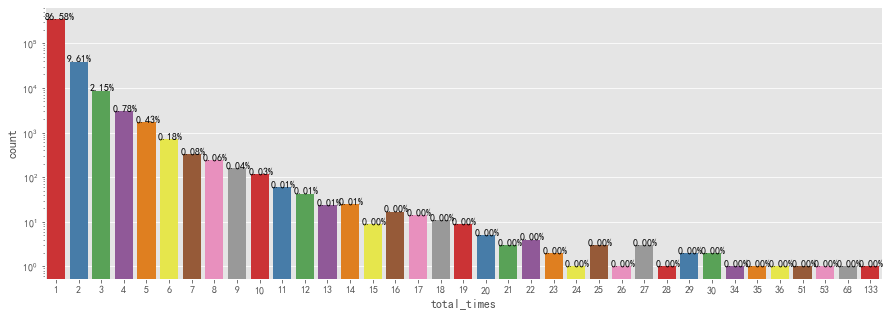

In [51]:
ax = sb.countplot(x =sort_orders2.total_times,data =sort_orders2,palette = 'Set1')
ax.set_yscale("log")
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(sort_orders2['total_times'])), (p.get_x() - 0.1, p.get_height()))

In [52]:
behavior_data.head()

,user_id,sku_id,action_time,type,date,hour,week
0,1455298,208441,2018-04-11 15:21:43,pv,2018-04-11,15,Wednesday
1,1455298,334318,2018-04-11 15:14:54,pv,2018-04-11,15,Wednesday
2,1455298,237755,2018-04-11 15:14:13,pv,2018-04-11,15,Wednesday
3,1455298,6422,2018-04-11 15:22:25,pv,2018-04-11,15,Wednesday
4,1455298,268566,2018-04-11 15:14:26,pv,2018-04-11,15,Wednesday


Daily consumption times,Daily views people, Daily consumption people, daily consumption people accupation,  daily consumption times per person

In [53]:
# daily active user
daily_active_user = behavior_data.groupby('date')['user_id'].nunique()

In [54]:
#daily buy user
daily_buy_user = behavior_data[behavior_data.type =='pay'].groupby('date')['user_id'].nunique()

In [55]:
# proportion of buyer
proportion_of_buyer = daily_buy_user/daily_active_user

In [56]:
# Daily consumption times
daily_buy_count  = behavior_data[behavior_data.type =='pay'].groupby('date').sku_id.count()

In [57]:
# consumption per buyer
consumption_per_buyer = daily_buy_count/daily_buy_user

In [58]:
pob_bar = pd.merge(daily_active_user,daily_buy_user, on = 'date').reset_index().rename(columns= {'user_id_x':'daily_active_user','user_id_y':'daily_buyer_user'}).set_index('date').stack().reset_index().rename(columns ={'level_1':'variable',0:'value'})

In [59]:
pob_bar.head()

,date,variable,value
0,2018-03-30,daily_active_user,105562
1,2018-03-30,daily_buyer_user,25154
2,2018-03-31,daily_active_user,103626
3,2018-03-31,daily_buyer_user,25462
4,2018-04-01,daily_active_user,102604


In [60]:
pob_bar.columns


Index(['date', 'variable', 'value'], dtype='object')

In [61]:
proportion_of_buyer = proportion_of_buyer.reset_index().rename(columns = {'user_id':'rate'})

In [62]:
proportion_of_buyer.head()

,date,rate
0,2018-03-30,0.238287
1,2018-03-31,0.245711
2,2018-04-01,0.241033
3,2018-04-02,0.246285
4,2018-04-03,0.242201


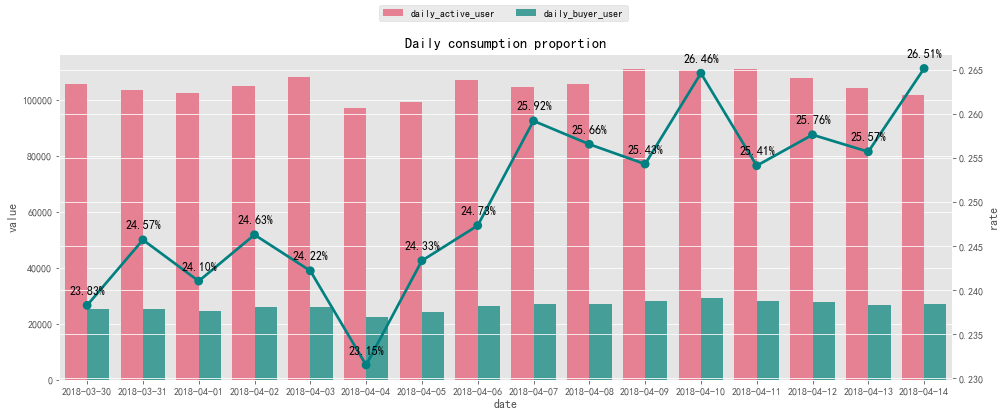

In [63]:
fig1 = plt.figure(figsize=[16,6])
ax1 = fig1.add_subplot(111)
ax2 = ax1.twinx()
sb.barplot(x = 'date',y = 'value',hue = 'variable',data =pob_bar,ax = ax1, palette = 'husl')
ax1.legend().set_title('')
ax1.legend().remove()
sb.pointplot(x = 'date',y ='rate',data = proportion_of_buyer,linetype = '--',color = 'teal',marker = 'D')
for i in range(0,16):
  plt.text(i+0.01,proportion_of_buyer['rate'][i]+0.001,'%.2f%%'%(proportion_of_buyer['rate'][i]*100),ha = 'center',va = 'bottom',fontsize = 12,fontweight ='bold')
fig1.legend(loc = 'upper center',ncol = 2)
plt.title('Daily consumption proportion')
plt.show()

There is no big difference between daily active people and daily consumption people. The proportion is around 20%.

In [64]:
cpb_bar = daily_buy_count.reset_index().rename(columns = {'sku_id':'Num'})

In [65]:
cpb_bar.head()

,date,Num
0,2018-03-30,28768
1,2018-03-31,29215
2,2018-04-01,28082
3,2018-04-02,29342
4,2018-04-03,29713


In [66]:
cpb_line = consumption_per_buyer.reset_index().rename(columns = {'date':'Date',0:'Frequency'})

In [67]:
cpb_line.head()

,Date,Frequency
0,2018-03-30,1.143675
1,2018-03-31,1.147396
2,2018-04-01,1.135498
3,2018-04-02,1.133990
4,2018-04-03,1.134950


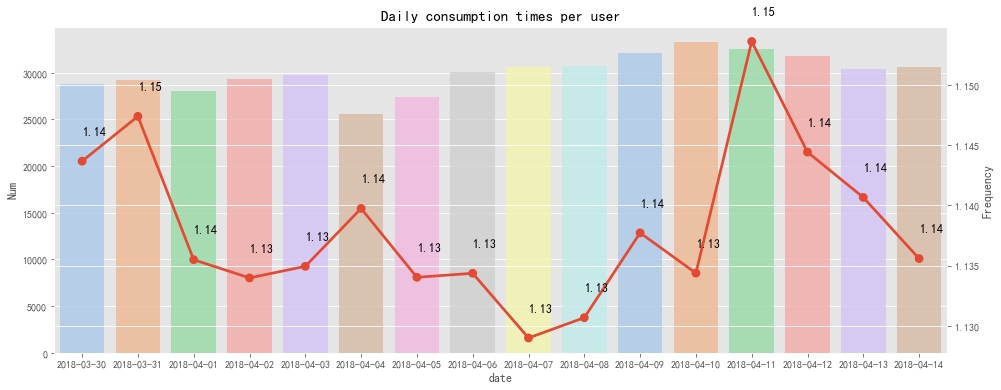

In [68]:
fig2 = plt.figure(figsize=[16,6])
ax3 = fig2.add_subplot(111)
ax4 = ax3.twinx()
sb.barplot(x='date',y ='Num',data =cpb_bar,palette = 'pastel',ax=ax3, alpha=0.8)
sb.pointplot(x= 'Date',y = 'Frequency', data = cpb_line,ax=ax4)
for i in range(0,16):
    plt.text(i+0.01,cpb_line['Frequency'][i]+0.002,f"{cpb_line['Frequency'][i]:.2f}",va = 'bottom',fontsize = 12,fontweight ='bold')
plt.title('Daily consumption times per user',fontsize = 15)
plt.show()

In [69]:
behavior_data.head()

,user_id,sku_id,action_time,type,date,hour,week
0,1455298,208441,2018-04-11 15:21:43,pv,2018-04-11,15,Wednesday
1,1455298,334318,2018-04-11 15:14:54,pv,2018-04-11,15,Wednesday
2,1455298,237755,2018-04-11 15:14:13,pv,2018-04-11,15,Wednesday
3,1455298,6422,2018-04-11 15:22:25,pv,2018-04-11,15,Wednesday
4,1455298,268566,2018-04-11 15:14:26,pv,2018-04-11,15,Wednesday


In [70]:
multi_con3= behavior_data.groupby(['user_id','date']).action_time.count().reset_index()

In [71]:
multi_con3.head()

,user_id,date,action_time
0,2,2018-03-30,1
1,2,2018-03-31,1
2,2,2018-04-02,2
3,2,2018-04-03,4
4,2,2018-04-04,8


In [72]:
multi_con3_detail = multi_con3[multi_con3['action_time']>=3]

In [73]:
multi_con3_detail.head()

,user_id,date,action_time
3,2,2018-04-03,4
4,2,2018-04-04,8
6,2,2018-04-07,8
7,2,2018-04-08,17
8,2,2018-04-09,11


In [74]:
multi_con3_detail_active3 = multi_con3_detail.groupby('date').user_id.count().reset_index()

In [75]:
multi_con3_detail_active3.head()

,date,user_id
0,2018-03-30,43448
1,2018-03-31,43864
2,2018-04-01,42866
3,2018-04-02,43399
4,2018-04-03,43983


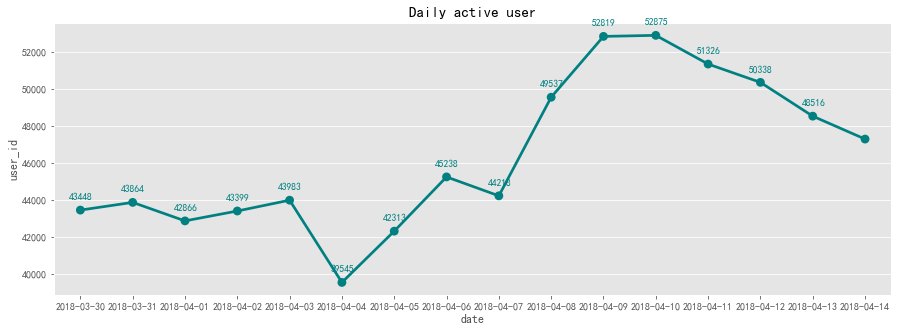

In [76]:
sb.pointplot(x = 'date',y = 'user_id',data = multi_con3_detail_active3,color = 'teal')
for i in range(0,15):
    plt.text(i+0.01,multi_con3_detail_active3['user_id'][i]+500,f"{multi_con3_detail_active3['user_id'][i]}",ha = 'center',va = 'bottom',fontsize = 9.5,fontweight = 'semibold',color = 'teal')
plt.title('Daily active user',fontsize = 15) 
plt.show()

##### It is stable before April 4th. After April 5th, the trend is up! Then the trend is down after April 10th. The marketing promotion might be the reason for up trend between April 7th to April 14th. 

In [77]:
multi_con3_sum = multi_con3.groupby('user_id').date.count()

In [78]:
multi_con3_sum.values

array([14,  8,  2, ...,  1,  3,  2], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Highly active user distribution')

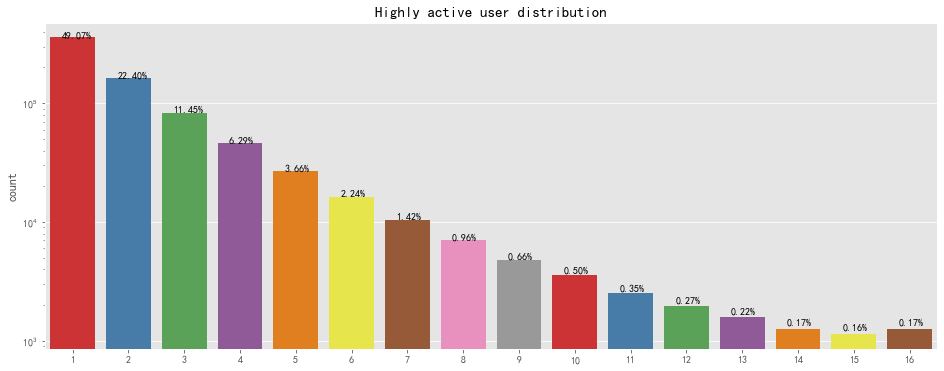

In [79]:
fig, ax = plt.subplots(figsize = [16,6])
ax.set_yscale('log')
sb.countplot(multi_con3_sum.values,palette = 'Set1')
for p in ax.patches:
   ax.annotate(f"{(p.get_height()/len(multi_con3_sum.values))*100:.2f}%",(p.get_x()+0.2,p.get_height()+100))
plt.title('Highly active user distribution',fontsize = 15)

##### Most users active period are no more than 6 days. We can try to put forward log in day-to-day awards.

In [80]:
daily_view_amount = behavior_data.groupby('date').user_id.count().reset_index()

In [81]:
daily_view_amount.head()

,date,user_id
0,2018-03-30,444890
1,2018-03-31,456330
2,2018-04-01,429185
3,2018-04-02,420194
4,2018-04-03,431010


Text(0.5, 1.0, 'Daily Views')

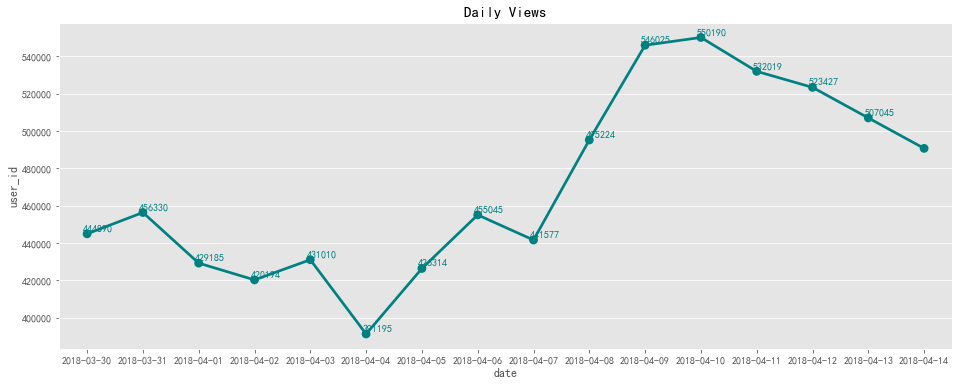

In [82]:
plt.figure(figsize = (16,6))
sb.pointplot(x ='date',y = 'user_id',data = daily_view_amount,color = 'teal' )
for i in range(15):
    plt.text(i+0.2,daily_view_amount['user_id'][i]+1000,f"{daily_view_amount['user_id'][i]}",ha = 'center',va = 'bottom',color = 'teal',weight = 'bold')
plt.title('Daily Views',fontsize = 15)    

In [83]:
daily_view_unique = behavior_data.groupby('date').user_id.nunique().reset_index()

In [84]:
daily_view_unique.head()

,date,user_id
0,2018-03-30,105562
1,2018-03-31,103626
2,2018-04-01,102604
3,2018-04-02,105061
4,2018-04-03,108092


Text(0.5, 1.0, 'Daily Viewers')

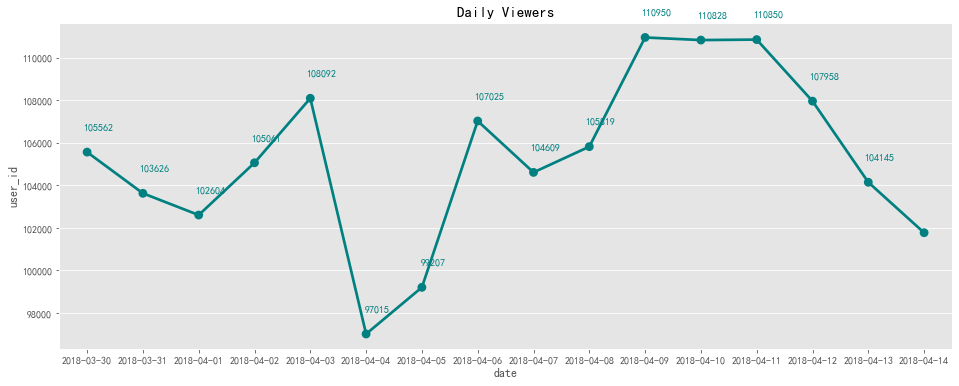

In [85]:
plt.figure(figsize = (16,6))
sb.pointplot(x ='date',y = 'user_id',data = daily_view_unique,color = 'teal' )
for i in range(15):
    plt.text(i+0.2,daily_view_unique['user_id'][i]+1000,f"{daily_view_unique['user_id'][i]}",ha = 'center',va = 'bottom',color = 'teal',weight = 'bold')
plt.title('Daily Viewers',fontsize = 15)    

###### The viewers and views have similar line graph trend. The shortest number is at April 4th. The reason might be April 4th is one traditional holiday in China. 

In [86]:
views_perhour = behavior_data[behavior_data.type =='pv'].groupby('hour').user_id.count().reset_index()

In [87]:
views_perhour.head()

,hour,user_id
0,0,222892
1,1,95449
2,2,50058
3,3,35245
4,4,31482


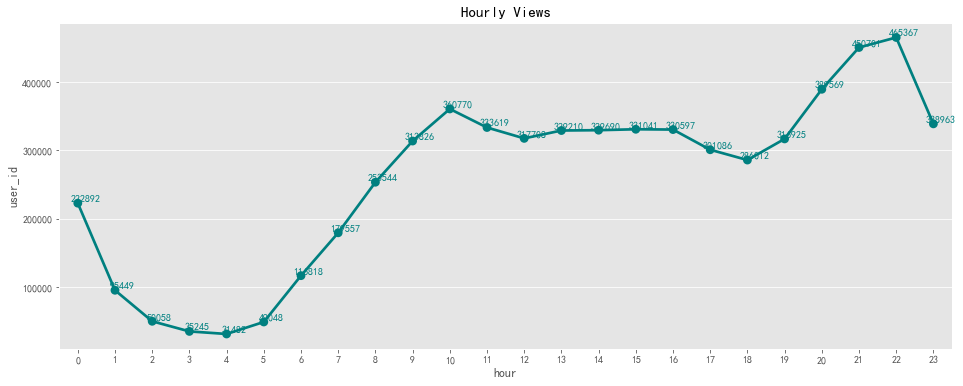

In [88]:
plt.figure(figsize = (16,6))
sb.pointplot(x ='hour',y = 'user_id',data = views_perhour,color = 'teal' )
for i in range(24):
    plt.text(i+0.2,views_perhour['user_id'][i]+1000,f"{views_perhour['user_id'][i]}",ha = 'center',va = 'bottom',color = 'teal',weight = 'bold')
plt.title('Hourly Views',fontsize = 15)
plt.show()

In [89]:
viewers_per_hour1 = behavior_data[behavior_data.type =='pv'].groupby('hour').user_id.nunique().reset_index()

In [90]:
viewers_per_hour1.head()

,hour,user_id
0,0,49726
1,1,23016
2,2,12989
3,3,9445
4,4,8969


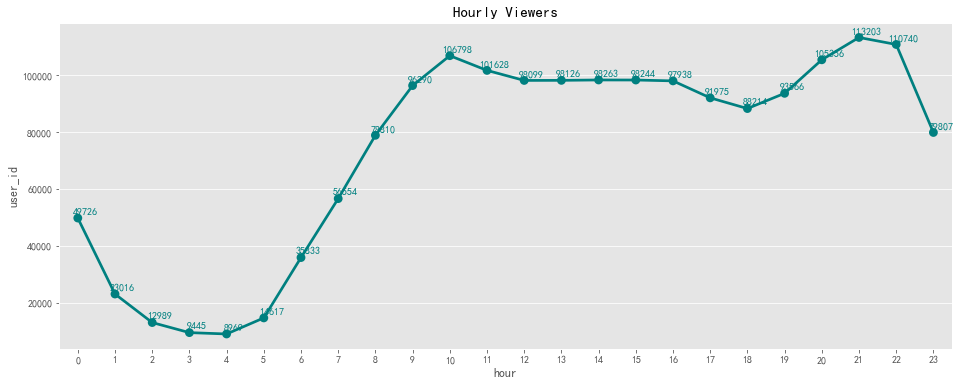

In [91]:
plt.figure(figsize = (16,6))
sb.pointplot(x ='hour',y = 'user_id',data = viewers_per_hour1,color = 'teal' )
for i in range(24):
    plt.text(i+0.2,viewers_per_hour1['user_id'][i]+1000,f"{viewers_per_hour1['user_id'][i]}",ha = 'center',va = 'bottom',color = 'teal',weight = 'bold')
plt.title('Hourly Viewers',fontsize = 15)
plt.show()

##### It is recommended to do system maintence between 0:00 am to 5:00 am in the morning. Then we can increase the promotion efforts for a product at 9 am and 21:00 pm.

In [92]:
behavior_data.head()

,user_id,sku_id,action_time,type,date,hour,week
0,1455298,208441,2018-04-11 15:21:43,pv,2018-04-11,15,Wednesday
1,1455298,334318,2018-04-11 15:14:54,pv,2018-04-11,15,Wednesday
2,1455298,237755,2018-04-11 15:14:13,pv,2018-04-11,15,Wednesday
3,1455298,6422,2018-04-11 15:22:25,pv,2018-04-11,15,Wednesday
4,1455298,268566,2018-04-11 15:14:26,pv,2018-04-11,15,Wednesday


In [93]:
type_detail_hour = pd.pivot_table(columns ='type',index = 'hour',data =behavior_data ,aggfunc=np.size,values= 'user_id')

In [94]:
type_detail_weekday=pd.pivot_table(columns = 'type',index = 'week',data = behavior_data,aggfunc=np.size,values ='user_id')

In [95]:
type_detail_weekday = type_detail_weekday.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [96]:
type_detail_hour.head()

type,cart,comm,fav,pay,pv
hour,,,,,
0,18005,3444,2514,12252,222892
1,7624,1524,1216,5253,95449
2,3955,846,662,2784,50058
3,2711,577,496,1730,35245
4,2368,518,385,1503,31482


In [97]:
tdh_line = type_detail_hour.stack().reset_index().rename(columns = {0:'Value'})

In [98]:
tdh_line.head()

,hour,type,Value
0,0,cart,18005
1,0,comm,3444
2,0,fav,2514
3,0,pay,12252
4,0,pv,222892


In [99]:
tdw_line = type_detail_weekday.stack().reset_index().rename(columns = {0:'Value'})

In [100]:
tdh_line.shape

(120, 3)

In [101]:
tdh_line = tdh_line[~(tdh_line['type'] == 'pv')]
tdh_line

,hour,type,Value
0,0,cart,18005
1,0,comm,3444
2,0,fav,2514
3,0,pay,12252
5,1,cart,7624
...,...,...,...
113,22,pay,32148
115,23,cart,25027
116,23,comm,6583
117,23,fav,4115


In [102]:
tdw_line = tdw_line[~(tdw_line['type']=='pv')]
tdw_line.head()

,week,type,Value
0,Monday,cart,83095
1,Monday,comm,27061
2,Monday,fav,12118
3,Monday,pay,61443
5,Tuesday,cart,82826


In [103]:
tdh_line.head()

,hour,type,Value
0,0,cart,18005
1,0,comm,3444
2,0,fav,2514
3,0,pay,12252
5,1,cart,7624


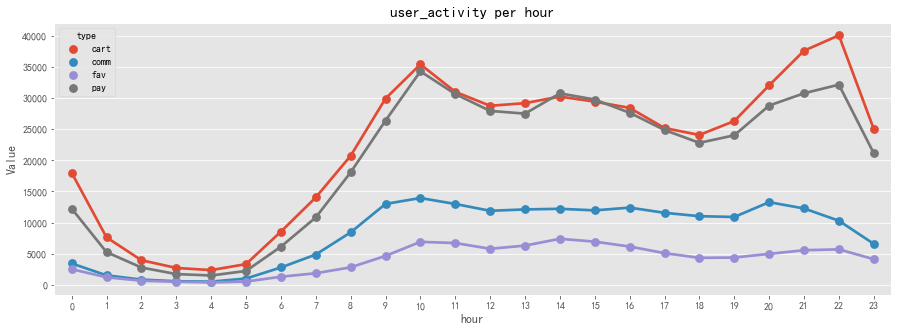

In [104]:
sb.pointplot(x = 'hour',y = 'Value',hue = 'type',data =tdh_line )
plt.title('user_activity per hour',size = 15)
plt.show()

##### Most people purchased staff soon after putting into the cart. Since less people set favoriate and comment, we can set up some rewards to the buyers after they make comments or favoriate.

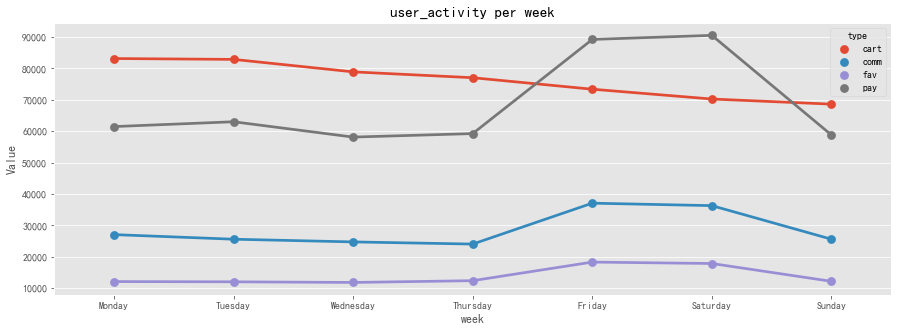

In [105]:
sb.pointplot(x = 'week',y = 'Value',hue = 'type',data =tdw_line )
plt.title('user_activity per week',size = 15)
plt.show()

##### The activities are stable betwen Monday and Thurday.It has highest trend between Friday and Saturday. It brings back to normal at Sunday. 

###### Funnel Conversion Chart

In [106]:
!pip install pyecharts

In [107]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
import math

In [108]:
behavior_data.head()

,user_id,sku_id,action_time,type,date,hour,week
0,1455298,208441,2018-04-11 15:21:43,pv,2018-04-11,15,Wednesday
1,1455298,334318,2018-04-11 15:14:54,pv,2018-04-11,15,Wednesday
2,1455298,237755,2018-04-11 15:14:13,pv,2018-04-11,15,Wednesday
3,1455298,6422,2018-04-11 15:22:25,pv,2018-04-11,15,Wednesday
4,1455298,268566,2018-04-11 15:14:26,pv,2018-04-11,15,Wednesday


In [109]:
type_dis = behavior_data['type'].value_counts().reset_index()
type_dis

,index,type
0,pv,6229177
1,cart,533890
2,pay,480149
3,comm,200399
4,fav,96779


In [110]:
type_dis['rate'] = round(type_dis.type/type_dis.type.sum(),3)

In [111]:
type_dis.style.bar(color = 'skyblue',subset ='rate')

,index,type,rate
0,pv,6229177,0.826000
1,cart,533890,0.071000
2,pay,480149,0.064000
3,comm,200399,0.027000
4,fav,96779,0.013000


##### Majority people just viewed the products. Less people made comments and saved them. We should improve the mutual connection between the website and customers. 

In [112]:
df_con = behavior_data[['user_id','sku_id','action_time','type']]

In [113]:
df_pv = df_con[df_con['type']=='pv']
df_cart = df_con[df_con['type']=='cart']
df_pay = df_con[df_con['type']=='pay']
df_comm = df_con[df_con['type']=='comm']
df_fav = df_con[df_con['type']=='fav']

In [114]:
df_pv_unid = df_con[df_con['type']=='pv']['user_id'].unique()
df_cart_unid = df_con[df_con['type']=='cart']['user_id'].unique()
df_pay_unid = df_con[df_con['type']=='pay']['user_id'].unique()
df_comm_unid = df_con[df_con['type']=='comm']['user_id'].unique()
df_fav_unid = df_con[df_con['type']=='fav']['user_id'].unique()

In [115]:
fav_cart_list = set(df_fav_unid)|set(df_pv_unid)
pv_pay_df = pd.merge(df_pv,df_pay,how ='inner',on = ['user_id','sku_id'],suffixes=['_pv','_pay'])
pv_pay_df = pv_pay_df[(pv_pay_df['user_id'].isin(fav_cart_list))&(pv_pay_df.action_time_pay<pv_pay_df.action_time_pv)]

In [116]:
uv = behavior_data['user_id'].nunique()
pv_pay_num = pv_pay_df['user_id'].nunique()
pv_pay_data = pd.DataFrame({'type':['View','Pay'],'Num':[uv,pv_pay_num]})
pv_pay_data['Conversation Rate']= round(pv_pay_data['Num']/pv_pay_data['Num'][0],4)*100

In [117]:
attr1 = list(pv_pay_data.type)
values1 = list(pv_pay_data['Conversation Rate'])
data1 = [[attr1[i],values1[i]] for i in range(len(attr1))]

In [118]:
pv_pay = Funnel(opts.InitOpts(width='700px',height = '400px')).add(series_name='',data_pair=data1,gap = 2,
        tooltip_opts = opts.TooltipOpts(trigger = 'item',formatter ="{b}:{c}%"),
        label_opts = opts.LabelOpts(is_show=True,position = 'inside'),
        itemstyle_opts= opts.ItemStyleOpts(border_color="#fff", border_width=1)).set_global_opts(title_opts=opts.TitleOpts(title = 'Funnel for customer behavior'))
pv_pay.render_notebook()

#### pv-cart-pay

In [131]:
pv_cart_df = pd.merge(left = df_pv,right = df_cart,how = 'inner',on = ['user_id','sku_id'],suffixes=['_view','_cart'])
pv_cart_df = pv_cart_df[pv_cart_df['action_time_view']<=pv_cart_df['action_time_cart']]
pv_cart_df = pv_cart_df[~pv_cart_df['user_id'].isin(df_fav_unid)]

In [136]:
pv_cart_pay_df=pd.merge(pv_cart_df,pv_pay_df,how ='inner',on = ['user_id','sku_id'])
pv_cart_pay_df = pv_cart_pay_df[pv_cart_pay_df['action_time_cart']<=pv_cart_pay_df['action_time_pay']]

In [134]:
pv_cart_pay_df.head()

,user_id,sku_id,action_time_view,type_view,action_time_cart,type_cart,action_time_pv,type_pv,action_time_pay,type_pay
0,1103962,37707,2018-04-11 13:29:53,pv,2018-04-11 16:04:06,cart,2018-04-11 16:03:32,pv,2018-04-11 13:45:55.0,pay
1,1103962,37707,2018-04-11 13:29:53,pv,2018-04-11 16:04:06,cart,2018-04-12 15:05:06,pv,2018-04-11 13:45:55.0,pay
2,1103962,37707,2018-04-11 13:29:53,pv,2018-04-11 16:04:06,cart,2018-04-12 15:05:06,pv,2018-04-11 16:04:41.0,pay
3,1103962,37707,2018-04-11 13:29:53,pv,2018-04-11 13:34:49,cart,2018-04-11 16:03:32,pv,2018-04-11 13:45:55.0,pay
4,1103962,37707,2018-04-11 13:29:53,pv,2018-04-11 13:34:49,cart,2018-04-12 15:05:06,pv,2018-04-11 13:45:55.0,pay


In [140]:
uv = behavior_data['user_id'].nunique()
pv_cart_num = pv_cart_df['user_id'].nunique()
pv_cart_pay_num = pv_cart_pay_df['user_id'].nunique()
pv_cart_pay_data = pd.DataFrame({'type':['view','cart','pay'],'num':[uv,pv_cart_num,pv_cart_pay_num]})
pv_cart_pay_data 

,type,num
0,view,728959
1,cart,155750
2,pay,25857


In [144]:
pv_cart_pay_data['convertion_rate']=round(pv_cart_pay_data['num']/pv_cart_pay_data['num'][0],4)*100

In [145]:
pv_cart_pay_data

,type,num,convertion_rate
0,view,728959,100.00
1,cart,155750,21.37
2,pay,25857,3.55


In [149]:
attr2 = list(pv_cart_pay_data['type'])
values = list(pv_cart_pay_data['convertion_rate'])
data2 = [[attr2[i],values[i]] for i in range(len(attr2))]

In [183]:
pv_cart_buy= (Funnel(opts.InitOpts(width='700px',height = '400px'))).add(series_name = "",data_pair=data2,
                                                                         gap=2,
                                                                         tooltip_opts=opts.TooltipOpts(trigger="item",formatter="{b}:{c}%"),
                                                                        label_opts=opts.LabelOpts(is_show=True,position="left"),
                                                                        itemstyle_opts=opts.ItemStyleOpts(border_color="#fff",border_width=1)).set_global_opts(
title_opts=opts.TitleOpts(title = 'Funnel for user behavior'))

In [184]:
pv_cart_buy.render_notebook()